# Machine Learning  
[機械学習の種類](https://sitest.jp/blog/?p=5897)

***Unsupervised Learning(教師なし)***  
    [クラスター分析](http://www.kamishima.net/jp/clustering/)

**The data**  
[Sklearnによるサンプルデータ生成](http://overlap.hatenablog.jp/entry/2015/10/08/022246)

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from pylab import mpl, plt

In [2]:
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
np.random.seed(1)
np.set_printoptions(suppress = True, precision = 4)
%matplotlib inline

In [3]:
from sklearn.datasets.samples_generator import make_blobs

In [4]:
X, y = make_blobs(n_samples = 250, centers = 4, random_state = 500, cluster_std = 1.25) #250samples, 4centers

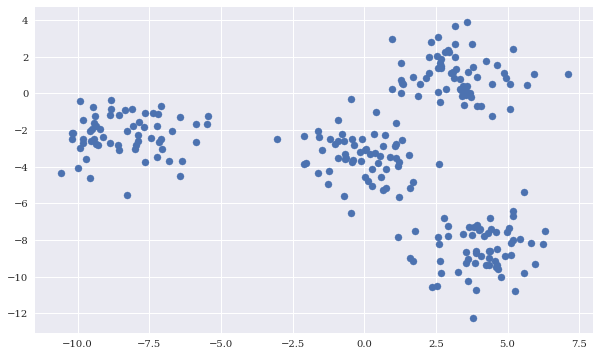

In [5]:
plt.figure(figsize = (10, 6))
plt.scatter(X[:, 0], X[:, 1], s = 50)

**k-means clustering**  
[k平均法](https://ja.wikipedia.org/wiki/K%E5%B9%B3%E5%9D%87%E6%B3%95)

In [6]:
from sklearn.cluster import KMeans

In [7]:
model = KMeans(n_clusters = 4, random_state = 0)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [8]:
y_kmeans = model.predict(X)

In [9]:
y_kmeans[:12]

array([1, 1, 0, 3, 0, 1, 3, 3, 3, 0, 2, 2], dtype=int32)

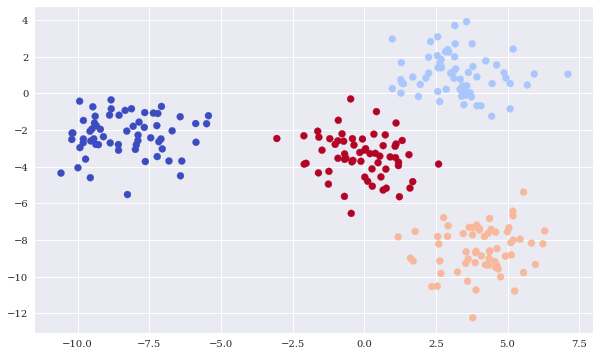

In [10]:
plt.figure(figsize = (10, 6))
plt.scatter(X[:, 0], X[:, 1], c = y_kmeans, cmap = 'coolwarm')

**Gaussian mixture**  
[混合ガウスモデル](https://datachemeng.com/gaussianmixturemodel/)  
確率密度を得られるモデル; ある元に対し、特定のクラスターにのみ1を当て、最もその確率が大きくなるクラスターに割り振る.

In [11]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=4, random_state=0)
model.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=4, n_init=1, precisions_init=None,
                random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [12]:
y_gm = model.predict(X)

y_gm[:12]

array([1, 1, 0, 3, 0, 1, 3, 3, 3, 0, 2, 2])

In [13]:
(y_gm == y_kmeans).all()

True

***Supervised Learning(教師あり)***

**The data**

In [14]:
from sklearn.datasets import make_classification

n_samples = 100

X, y = make_classification(n_samples=n_samples, n_features=2,
                                    n_informative=2, n_redundant=0,
                                    n_repeated=0, random_state=250)

X[:5]

array([[ 1.6876, -0.7976],
       [-0.4312, -0.7606],
       [-1.4393, -1.2363],
       [ 1.118 , -1.8682],
       [ 0.0502,  0.659 ]])

In [15]:
X.shape

(100, 2)

In [16]:
y[:5]

array([1, 0, 0, 1, 1])

In [17]:
y.shape

(100,)

([array([ 1.,  4., 17., 16., 19., 15., 19.,  8.,  0.,  1.]),
  array([ 2.,  6., 11., 24., 14., 22., 16.,  2.,  2.,  1.])],
 array([-3.4454, -2.7022, -1.9591, -1.2159, -0.4727,  0.2704,  1.0136,
         1.7568,  2.4999,  3.2431,  3.9863]),
 <a list of 2 Lists of Patches objects>)

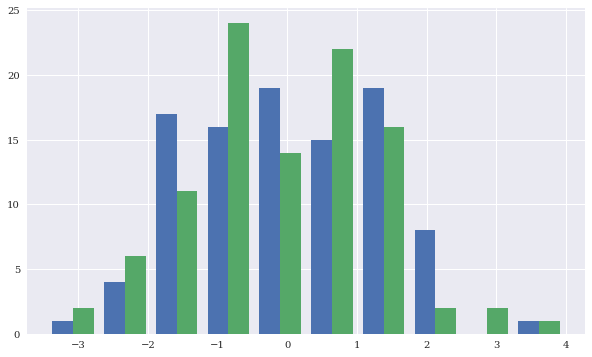

In [18]:
plt.figure(figsize = (10, 6))
plt.hist(X)

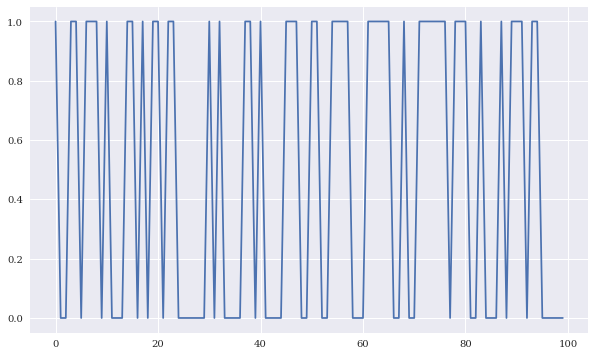

In [19]:
plt.figure(figsize = (10,6))
plt.plot(y)

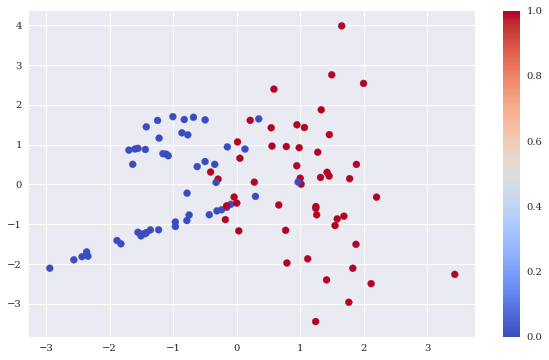

In [20]:
plt.figure(figsize = (10, 6))
plt.scatter(x = X[:, 0], y = X[:, 1], c = y, cmap = 'coolwarm')
plt.colorbar()

**Gausssian Naive Bayes**  
[単純ベイズ](https://avinton.com/academy/naive-bayes/)

In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [22]:
model = GaussianNB()

In [23]:
model.fit(X, y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [24]:
model.predict_proba(X).round(4)[:5]

array([[0.0041, 0.9959],
       [0.8534, 0.1466],
       [0.9947, 0.0053],
       [0.0182, 0.9818],
       [0.5156, 0.4844]])

In [25]:
pred = model.predict(X)

In [26]:
pred == y

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True])

In [27]:
accuracy_score(y, pred)

0.87

In [28]:
Xc = X[y == pred]
Xf = X[y != pred]

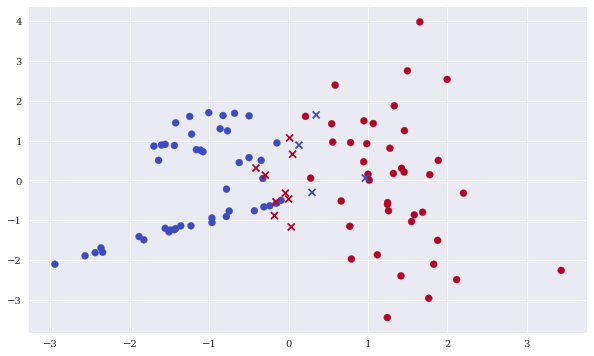

In [29]:
plt.figure(figsize = (10, 6))
plt.scatter(x = Xc[:, 0], y = Xc[:, 1], c = y[y == pred], marker = 'o', cmap = 'coolwarm')
plt.scatter(x = Xf[:, 0], y = Xf[:, 1], c = y[y != pred], marker = 'x', cmap = 'coolwarm')

**Logistic regression**  
[ロジスティック回帰](https://ja.wikipedia.org/wiki/%E3%83%AD%E3%82%B8%E3%82%B9%E3%83%86%E3%82%A3%E3%83%83%E3%82%AF%E5%9B%9E%E5%B8%B0)

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
model = LogisticRegression(C = 1, solver = 'lbfgs')

In [32]:
model.fit(X, y)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
model.predict_proba(X).round(4)[:5]

array([[0.011 , 0.989 ],
       [0.7266, 0.2734],
       [0.971 , 0.029 ],
       [0.04  , 0.96  ],
       [0.4843, 0.5157]])

In [34]:
pred = model.predict(X)

In [35]:
accuracy_score(y, pred)

0.9

In [36]:
Xc = X[y == pred]
Xf = X[y != pred]

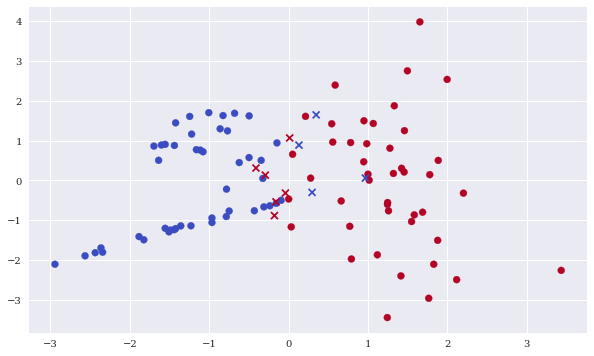

In [37]:
plt.figure(figsize = (10, 6))
plt.scatter(x = Xc[:, 0], y = Xc[:, 1], c = y[y == pred], marker = 'o', cmap = 'coolwarm')
plt.scatter(x = Xf[:, 0], y = Xf[:, 1], c = y[y != pred], marker = 'x', cmap = 'coolwarm')

**Decision trees**  
[決定木](https://ja.wikipedia.org/wiki/%E6%B1%BA%E5%AE%9A%E6%9C%A8)

In [38]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=1)
model.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [39]:
model.predict_proba(X).round(4)[:5]

array([[0.08, 0.92],
       [0.92, 0.08],
       [0.92, 0.08],
       [0.08, 0.92],
       [0.08, 0.92]])

In [40]:
pred = model.predict(X)

In [41]:
accuracy_score(y, pred)

0.92

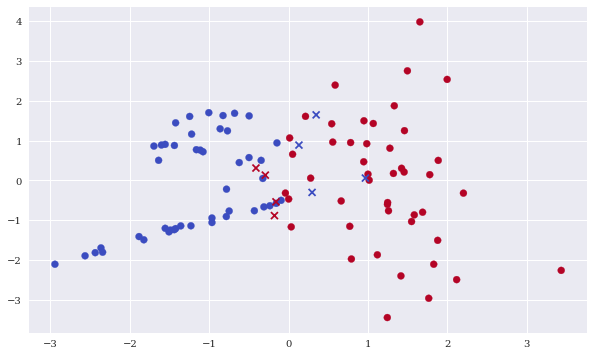

In [42]:
Xc = X[y == pred]
Xf = X[y != pred]
plt.figure(figsize = (10, 6))
plt.scatter(x = Xc[:, 0], y = Xc[:, 1], c = y[y == pred], marker = 'o', cmap = 'coolwarm')
plt.scatter(x = Xf[:, 0], y = Xf[:, 1], c = y[y != pred], marker = 'x', cmap = 'coolwarm')

In [43]:
print('{:>8s} | {:8s}'.format('depth', 'accuracy'))
print(20 * '-')
for depth in range(1, 7):
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(X, y)
    acc = accuracy_score(y, model.predict(X))
    print('{:8d} | {:8.2f}'.format(depth, acc))

   depth | accuracy
--------------------
       1 |     0.92
       2 |     0.92
       3 |     0.94
       4 |     0.97
       5 |     0.99
       6 |     1.00


**Deep neural networks**  
[ディープラーニング](https://ja.wikipedia.org/wiki/%E3%83%87%E3%82%A3%E3%83%BC%E3%83%97%E3%83%A9%E3%83%BC%E3%83%8B%E3%83%B3%E3%82%B0)

In [44]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(solver='lbfgs', alpha=1e-5,
                               hidden_layer_sizes=2 * [75], random_state=10)

%time model.fit(X, y)

CPU times: user 546 ms, sys: 13.9 ms, total: 560 ms
Wall time: 302 ms


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[75, 75], learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=10, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [45]:
pred = model.predict(X)
pred

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0])

In [46]:
accuracy_score(y, pred)

1.0

*DNNs with TensorFlow*   
[テンソルフロー](https://www.ossnews.jp/oss_info/TensorFlow)  
「TensorFlow(テンソルフロー)とは、Googleのディープラーニングライブラリです。データフローグラフを使用したライブラリで、複雑なネットワークを分かりやすく記述できます。」

In [47]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)  

fc = [tf.contrib.layers.real_valued_column('features')]  

model = tf.contrib.learn.DNNClassifier(hidden_units=5 * [250],n_classes=2,feature_columns=fc)  

def input_fn():  
    fc = {'features': tf.constant(X)}
    la = tf.constant(y)
    return fc, la

%time model.fit(input_fn=input_fn, steps=100)

/Users/norihito_kita/anaconda3/lib/python3.7/site-packages/dask/config.py:131: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


CPU times: user 4.41 s, sys: 230 ms, total: 4.64 s
Wall time: 3.95 s


DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._BinaryLogisticHead object at 0x1a238f3ef0>, 'hidden_units': [250, 250, 250, 250, 250], 'feature_columns': (_RealValuedColumn(column_name='features', dimension=1, default_value=None, dtype=tf.float32, normalizer=None),), 'optimizer': None, 'activation_fn': <function relu at 0x1a34f82b70>, 'dropout': None, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'input_layer_min_slice_size': None})

In [48]:
model.evaluate(input_fn = input_fn, steps =1)

{'loss': 0.18701501,
 'accuracy': 0.9,
 'labels/prediction_mean': 0.5014784,
 'labels/actual_label_mean': 0.5,
 'accuracy/baseline_label_mean': 0.5,
 'auc': 0.97859997,
 'auc_precision_recall': 0.9781445,
 'accuracy/threshold_0.500000_mean': 0.9,
 'precision/positive_threshold_0.500000_mean': 0.9,
 'recall/positive_threshold_0.500000_mean': 0.9,
 'global_step': 100}

In [49]:
pred = np.array(list(model.predict(input_fn = input_fn,)))
pred[:10]

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 1])

In [50]:
%time model.fit(input_fn = input_fn, steps = 750)

CPU times: user 9.99 s, sys: 591 ms, total: 10.6 s
Wall time: 5.32 s


DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._BinaryLogisticHead object at 0x1a238f3ef0>, 'hidden_units': [250, 250, 250, 250, 250], 'feature_columns': (_RealValuedColumn(column_name='features', dimension=1, default_value=None, dtype=tf.float32, normalizer=None),), 'optimizer': None, 'activation_fn': <function relu at 0x1a34f82b70>, 'dropout': None, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'input_layer_min_slice_size': None})

In [51]:
model.evaluate(input_fn = input_fn, steps =1)

{'loss': 0.09858808,
 'accuracy': 0.94,
 'labels/prediction_mean': 0.527581,
 'labels/actual_label_mean': 0.5,
 'accuracy/baseline_label_mean': 0.5,
 'auc': 0.9964,
 'auc_precision_recall': 0.9965874,
 'accuracy/threshold_0.500000_mean': 0.94,
 'precision/positive_threshold_0.500000_mean': 0.9074074,
 'recall/positive_threshold_0.500000_mean': 0.98,
 'global_step': 850}

**Feature transforms**  
特徴変換

In [52]:
from sklearn import preprocessing

In [53]:
X[:5]

array([[ 1.6876, -0.7976],
       [-0.4312, -0.7606],
       [-1.4393, -1.2363],
       [ 1.118 , -1.8682],
       [ 0.0502,  0.659 ]])

In [54]:
Xs = preprocessing.StandardScaler().fit_transform(X)
Xs[:5]

array([[ 1.2881, -0.5489],
       [-0.3384, -0.5216],
       [-1.1122, -0.873 ],
       [ 0.8509, -1.3399],
       [ 0.0312,  0.5273]])

In [55]:
Xm = preprocessing.MinMaxScaler().fit_transform(X)
Xm[:5]

array([[0.7262, 0.3563],
       [0.3939, 0.3613],
       [0.2358, 0.2973],
       [0.6369, 0.2122],
       [0.4694, 0.5523]])

In [56]:
Xn1 = preprocessing.Normalizer(norm = 'l1').transform(X)
Xn1[:5]

array([[ 0.6791, -0.3209],
       [-0.3618, -0.6382],
       [-0.5379, -0.4621],
       [ 0.3744, -0.6256],
       [ 0.0708,  0.9292]])

In [57]:
Xn2 = preprocessing.Normalizer(norm = 'l2').transform(X)
Xn2[:5]

array([[ 0.9041, -0.4273],
       [-0.4932, -0.8699],
       [-0.7586, -0.6516],
       [ 0.5135, -0.8581],
       [ 0.076 ,  0.9971]])

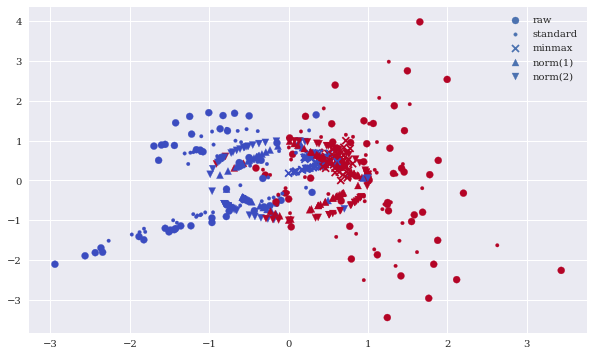

In [58]:
plt.figure(figsize=(10, 6))
markers = ['o', '.', 'x', '^', 'v']
data_sets = [X, Xs, Xm, Xn1, Xn2]
labels = ['raw', 'standard', 'minmax', 'norm(1)', 'norm(2)']
for x, m, l in zip(data_sets, markers, labels):
    plt.scatter(x=x[:, 0], y=x[:, 1], c=y, marker=m, cmap='coolwarm', label=l)
plt.legend()

In [59]:
X[:5]

array([[ 1.6876, -0.7976],
       [-0.4312, -0.7606],
       [-1.4393, -1.2363],
       [ 1.118 , -1.8682],
       [ 0.0502,  0.659 ]])

In [60]:
Xb = preprocessing.Binarizer().fit_transform(X)
Xb[:5]

array([[1., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [1., 1.]])

In [61]:
2 ** 2

4

In [62]:
Xd = np.digitize(X, bins = [-1, 0, 1])
Xd[:5]

array([[3, 1],
       [1, 1],
       [0, 0],
       [3, 0],
       [2, 2]])

In [63]:
4 ** 2

16

**Train-test splits: Support vector machines**  
ここまでは学習と予測を同じデータで行なっていたがもちろん違うデータでも行えることを示してくれるそうです.  
使う手法：[サポートベクターマシン](https://ja.wikipedia.org/wiki/%E3%82%B5%E3%83%9D%E3%83%BC%E3%83%88%E3%83%99%E3%82%AF%E3%82%BF%E3%83%BC%E3%83%9E%E3%82%B7%E3%83%B3)

In [64]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [65]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [66]:
model = SVC(C = 1, kernel = 'linear')

In [67]:
model.fit(train_x, train_y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [68]:
pred_train = model.predict(train_x)

In [69]:
accuracy_score(train_y, pred_train)

0.9402985074626866

In [70]:
pred_test = model.predict(test_x)

In [71]:
test_y == pred_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False,  True,  True,  True, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True])

In [72]:
accuracy_score(test_y, pred_test)

0.7878787878787878

In [73]:
test_c = test_x[test_y == pred_test]
test_f = test_x[test_y != pred_test]

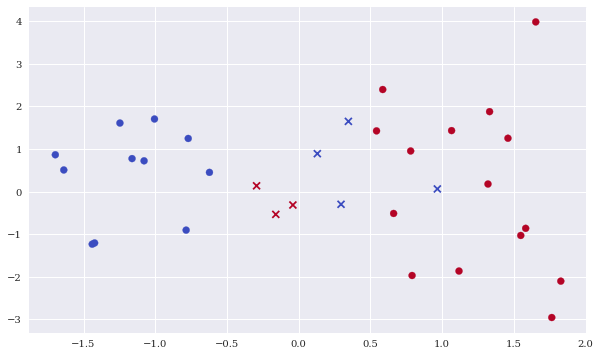

In [74]:
plt.figure(figsize = (10, 6))
plt.scatter(x = test_c[:, 0], y = test_c[:, 1], c = test_y[test_y == pred_test], marker = 'o', cmap = 'coolwarm')
plt.scatter(x = test_f[:, 0], y = test_f[:, 1], c = test_y[test_y != pred_test], marker = 'x', cmap = 'coolwarm')

In [75]:
bins = np.linspace(-4.5, 4.5, 50)

In [76]:
Xd = np.digitize(X, bins = bins)

In [77]:
Xd[:5]

array([[34, 21],
       [23, 21],
       [17, 18],
       [31, 15],
       [25, 29]])

In [78]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [79]:
print('{:>8s} | {:8s}'.format('kernel', 'accuracy'))
print(20 * '-')
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    model = SVC(C=1, kernel=kernel, gamma='auto')
    model.fit(train_x, train_y)
    acc = accuracy_score(test_y, model.predict(test_x))
    print('{:>8s} | {:8.3f}'.format(kernel, acc))

  kernel | accuracy
--------------------
  linear |    0.788
    poly |    0.848
     rbf |    0.788
 sigmoid |    0.848
